# 1. Four Branches of machine learning
___

Supervised learning os just the tip of iceberg-Machine learning is a vaast field with a complex subfiled taxonomy.Machine-learning algorithms generally fall into four broad categories,described in the following sections.  

### 1. Supervised learning  

This is the most common case.It consist of learningto mao input data to the known targets(Also called annotation), given a set of examples( often annotated by humans).Generally, almost all application of deeplearning that are in the spotlight these days belong in this category.such as OCR(optical character recogination), speech rcogination, image c;assification and languages translation.  

Although supervised learning consist of classifications anf regression,there are more exotic variants liek:
> **Sequence generation** -  Given a picture, predict a caption describing describing it.SEquence generation can be reformulated as a series of classification problems(Repeated prediction of a word ot token in a sequence).  

> **Syntax tree prediction** - Given a sentence, predict its composition into a syntax tree.  

> **Object detection** - Given a picture, draw a boundin box around certian objects inside a picture.This can also be expressed as a classification problem(Given many candiadate boundig boxes, classify the contenets of each one) or as a joint classification or reression problem, where the bounding-box cordinate are predicted via vector regression.    

> **Image segmentation** -  Given a picture, draw a pixel-level mask o a specific object.  


### 2. Unsupervised learning    


This branch of machine learning consist of finding interesting transformation of the input data without the help of any targets, for the purpose of **data visualization**, **data compression**, or **data denoising** or to better understand  the correlatios present in the data at hand. Unsupervised learning is the bread and butter of data analytics, and it's often a necessary step in understanding a dataset before attempting to solve a supervised-learning problem. **Dimensionality reduction** and **clustering** are well-known categories of unsupervised learning.   


### 3. Self-supervised learning   

This is a a specific instance of supervised learning, but it's different enough that it deserves its own category.Self-supervised learning is supervised learning without **human-annotated** label- We can think of it as a supervised learning withuout any humans in the loop.There are still labels invovled (Because the learning has to be supervised by something), but they are generated from input data, typically using a heuristic algorithm.  


For example,`autoencoders` are a well-known instance of self-supervised learning, where the generated targets are the input, unmodified. In the same way, **trying to predict he next frame in a video, given past frames** or **the next words in a texxt, given previous words**, are the instances of self-supervised learning(**temporally supervised learning**, in this case: supervision come from future input data). Note that distinction between supervised, self-supervised, and unsupervised learning can be blurry sometimes-these categories are more  of a continuum without solid borders. Self supervised learning can reinterpreted as either supervised or unsupervised learning, Depending on whether you pay attention to the learning mechanism or to the contextt of its application.  


### 4. Reinforcement learning  

Long ovelooked, this approcah of machine learning recently strarted to get a lot of attention after **Google DeepMind** successfully applied it to learning o play Atari games( and later to play Atari games). In reinforcment learning, an **agent** receives information about its environment and learns to choose actions that will maximize some rewards.For instance, a neural network htat 'looks' at the video game screen and outputs game actions in order to maximize its score card can be trained via reinforcement learning.  

Currently, reinforcment learning is mostrly a research area and hasn't yet had significant pratical success beyond games,In time however, we except to see reinforcment learning take over a increasingly karge range of real-world appications, self-driving cars, roboticsm resource managment, education and so on.

## Classification and Regression glossary
___

Classification nad regression involve many specalized terms. They have precise,machine learning-specific defination and you should be familiar with them:

1. **samples or input** - One dat point that goes into your model  


2. **Prediction or output** - What comes out of your model  


3. **Target** - The truth, What your model should ideally have predicted, according to an external source of data.  


4. **Prediction error or loss value** - A measure of the distance between model's prediction and the target.   


5. **Classes** - A set of possible labels to choose from in a classification problems.  


6. **Label** - A specific instances of a class annotation in a classification problem.For examples, if picture #1234 is annotaed as containng the class "dog," the dog is a label of #1234.   



7. **Ground-truth or annotations** - All targets of a datasets, typically collected by humans.    



8. **Binary classification** - A classification task where each input sample should be categorized into two exclusive categories.  




9. **Multiclass classification** - A classification task where each  input sample should be categorized into more than two categories: for instances, classifying handwritten digits.   



10. **Miltilabel classification** - A classification task where each input samples can be assigned multiple labels. For instances, a given image may contain both a cat and a dag and should be annotaed with with the cat label and the dog label.The number of labels per image is usually variable.   



11. **Vector regression** - A task where the target is set of continous value: for example, a continous vector,If you're doing regression against multiple values(such as cordinated of a bounding box in an image), then you're doing vector regression.    



12. **Scalar regression**- A task where the target is a set of continous values: for example, predicting house prices is a good example: the different target prices from a continous space.   



13. **Mini-batch or batch**- A small set of samples (typically between 8 and 128) that are processed simultaneously by the model.**The number of samples is often a power of 2**, to facilitate memory allocation on GPU. **When training, a minibatch is used to compute a single-gradient desccent update applied to the weights of the model**. 





# 2. Evaluating machine-learning models
___

In basic workfow, we split the data into a **training set**, a **validation set** and a **test set**.The reason not to evaluate the models on the same data, they were trained on quickly became evident: after just a few epochs, all the models began to `overifit`.That is, their performance on never-before-seen data started stalling(or worseing) compared to their performance on the training data-which always improves the training progresses.  

In machine learning the goal is to achieve models that `generalize` -that perform well on never-seen-before-data- and overfitting is the central obstacle.You can only control that which you can observe, so ti's crucial to be able to reliably measure the generalization power of the model.The follwoing sections look at stratgies for mitigating overfittingand maximizing generalization.In this section, we'll focus on how to measure generalization and how to evaluate machine learning models.

## Training, validation and test sets
___

Evaluating model always boils down to splitting the available data into three sets: Training, validation and test.You train on the training dta and evaluate your model on the validation data.Once your model is ready for prime time, you tets it one final time on the test data. 

Why can't be use only two sets; a trainig sets and a test set?, you'd train on the training data and evaluate on the test data.Much simpler!  

The reason is that devloping a model always involves tuning its configuration: for example, choosing the number of layer or the size o layers(called the `hyperparameters` of the model, to distinguidh them from the parametrs, which are the network's weights.)Youu do this tuning as a feedback signal, the performance of the model on the validation. In essensce this tuning si a form of learning, a search for a good configuration in some parameter space.As a result, tuning the configuration of the model based on its performance on the validation set cn quickly reuslt in the `ocerfitting to the validation set`, even though your model is nver directly trained on it.  

Central to this phenomenon is the notion of `information leaks`. Every time you tune a hyperparameter of your model based on the model's performance on the validation set, some information about the validation data leaks into the model.If you do this only once, for one parameter, then very few bits of informtion will leaks, and your validation set will be still reliable to evaluate the model.But if you repeat this many-times- running one experiment,evaluating on the validation set, and modifying your model as a result-then you'll leak an increasingly significant amout of information about the validation set into the model.  

At the end of the day, you'll end up with the model that paerforms artificailly well on the the validation dta, beacuse that's what you optimized it for.**You care about performance on completly new data, not the validation data**, so you need to use a completlley different, never-before-seen dataset to evaluate the model:the test dataset.Your model shouldn't have had access to any information about the test test,even indirectly.**If anything about the model has been tuned based on the set performance, then your measure of generalization will be flawed.**  

Splitting your data into training, validation, and test sets may seem straightforward, but there are a few advanced ways to do it that can come in handy when little dta is available.Let's review three classic evaluation recipies: **simple hold-out validation**, **K-fold validation** and the **iterated k-fold validation with shuffling**. 


## Simple  Hold-Out Validation
___

Set apart some fraction of your data as your test set. Train on the Remaining data, and evalaute it on the test set. As you saw in the previous sections, in order to prevent information leaks, you shouldn't tunw our model based on the test st, and therfore you should also reserve a valaidation set.  


> **NOTE:**  Matplotlib has both functional and Objected oriented API [Official blog for Functional and OO API](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)  


> How calculation of parameters occur in model.summary. [Parameters calculation in keras model](https://towardsdatascience.com/how-to-calculate-the-number-of-parameters-in-keras-models-710683dae0ca)


In [43]:
num_validation_samples = 10
data = np.random.random((100,3))
np.random.shuffle(data)  ## Shuffling the data is usually appropriate

validation_data = data[:num_validation_samples]  ## defining the validation sets
data = data[num_validation_samples:]  

training_data = data[:]  ## defining training data

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data) ## Train model on training data and evaluate it on validation data

# At this point you can tune your model,
#retrain it, evaluate it, tune it again...

model = get_model()
model.train(np.concatenate([training_data,validation_data])) ## Once you tuned your hyperparameter, it's common to
## Train your final model from scratch on all non-test data available.  

test_score = model.evaluate(test_data)

This is the simplest evaluation protocol, and it suffers from one flaw: if little data is available, then your validation and test sets may conatin too few samples to be statistically representative of the data t hand.This is easy to recognize: **If differernt random shuffling rounds of the data before splitting end up yielding very different measures of model performance, then you're having this issue.K-Fold validation and iterated K-fold validation are two ways to address this.**

## K-Fold validation
___   


With this appracoh, we split our data into K partitons of equal sizes.Forach each partition `i` train a model on the remaining `k-1` partitions and evaluate it on partition `i`.  

The final score is then average of the **K** scores obtained.This method is helpful when the performance of the model show significant variance based on your training-test spliy, like holdout validation this method doesn't exempt you from using a distinct validation set for model calibration.

In [57]:
import numpy as np

data = np.random.random((100,1))

k=4
num_validation_samples = len(data) // k
np.random.shuffle(data)

validation_scores = []
val_data = []
train_data = []
for fold in range(k):
    validation_data = val_data.append(data[num_validation_samples*fold:num_validation_samples*(fold+1)]) ## selecting validation data partition
    training_data = train_data.append(np.concatenate([data[:num_validation_samples*fold],data[num_validation_samples*(fold+1):]]))
    
    ### Using the remainder of the data as training data
    
    model = get_model()  ## create a brand_new instances of the model
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score) 

validation_score = np.average(validation_scores) ## avaergage of the validation score of k-fold

model = get_model()
model.train(data)
test_score = model.evaluate(test_data) ### Train the final model on all non-test data available

## Iterated K-Fold validation with shuffling
___

This one is for situations in which we have relatively little data available and you need to evaluate your model as precisely as possible.This is extremly helpfule in kaggele competitions.It consist of applying K-Fold validation multiple times, shuffling the data every time before splitting it into k ways.The final score is the avergae of the scores obtained at each run of K-fold validation.Note that with this method we end up training model and evaluating **P x k** models(Where P is the number of iterations you use), which can be very expensive.

## Things to keep in mind
___

1. __*Data Representativeness*__: You want both training set and test set to be represntative of the data at hand.For instance, if you're trying to classify images if digits and you're starting from an array of samples where the samples are ordered by theor classe, taking the first 80% of thae array as your training set and the reamaining 20% as your test set will result in your training set containing only classes 0-7, whereas your test set contain only classes 8-9.This seems like a ridiculous mistake,but it's surprisingly common.For this reason , you usually should randomly shuffle your data before splitting  into training and testing set.  

2. __*The arrow of time*__: If you're trying to predict the future given in the past(for example, tommorow's weather, stock movement and son on), you should not randomly shuffle your data before splitting it, beacuse doing so will create a **Temporal leak**: Your data will effectivley be trained on data from the futire.In such situtations, you should always make sure all data in your test set is *posterior to the data in the training set.*   

3. __*Redundancy in your data*__: If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundcancy between the training and validation sets.In effect, you'll testing on part of your training data, which is the worst thing you can do! **make sure your training set and validation set are disjoint(lacking coherence or orderly sequence).**

# 3. Data preprocessing,feature engineering and feature learning
___

In addition to model evaluation, an important questionwe must tackle before we dive deeper itno model developement is the following: How do you prepare the input data and targets before feedin them into a neural network?Many data pre-processing and feature-engineering technique are domain specific( for example, specific to text and image domain).  

### Data preprocessing for neural network  

Data preprocessing aims at making the raw data at hand more amenable to neural network.This include **Vectorization**,**Handling missing values**, and **feature extraction**.  

**Vectorization**  

All inputs and targets in a neural network must be tensors of floating-point data(in specific cases, tensors of digit).Whatever data you need to process-sound,images,text- you must first turn it into tensors, as step called **Data vectorization**. For instance, in the two previous text-classification examples, we started from text represented as list of integers and we used one-hot endoing to convert them into tensor32 data.  


**Value normalization**

In the digit-classification example,you started from image data and encoded as integers in the 0-255 range,encoding grayscale values.Before you fed this data into your network, you had to cast it to float32 and divide by 255 so we will then end up with value in the range of 0-1.In case of regression you have data whose value ae higher in range and some have small floating point values, Before you fed this data into your network.You had to normalize each feature independently so that it had a standard deviation of 1 and a mean of 0.  

In general, it is not safe to feed into a neural network data that takes relatively large value(multidigit integers, which are much larger than the inditial values taken by the weights of a network) or data that is heterogenous( for example, data where one feature is in the range of 0-1 and other in range 100-200).Doing so can trigger large gradinet updates that will prevent the newtwork from converging.To make learning easier for you network, your data should have the follwoing characterstics:  

1. **Take small values** - Typically most values should be in the 0-1 range
2. **Be homogenous** - All features, should take values in roughly the same range  

The follwing stricter nnormalization practice is comon and can help, although it isn't necessay:
1. Normalize each feature independently to have a mean of 0.
2. Normalize each feature independetly to have a standard deviation of 1

[Why normaize the data](https://www.youtube.com/watch?v=WaHQ9-UXIIg&t=25s)  
This is easy to do with numpy arrays.  
[The idea of making data have a zero mean](https://stats.stackexchange.com/questions/104528/the-idea-of-making-the-data-have-a-zero-mean)

In [45]:
import numpy as np

x = np.linspace(1,100,50)

print("Mean: ",x.mean())
print("Standard deviation: ",x.std())

x -= x.mean() ## Subtracting all data with the averge mean
x /= x.std()
print("____________________________________________________")
print("Mean: ",x.mean(axis=0))
print("Standard deviation: ",x.std() )

Mean:  50.49999999999999
Standard deviation:  29.1562469240106
____________________________________________________
Mean:  7.549516567451065e-17
Standard deviation:  0.9999999999999999


Here you can see that mean is almost close to zero and standard devitation is almost 1.

In [49]:
import matplotlib.pyplot as plt
from scipy import stats

In [50]:
density = stats.kde.gaussian_kde(x)

In [63]:
density.covariance_factor = lambda : 0.25
density._compute_covariance()

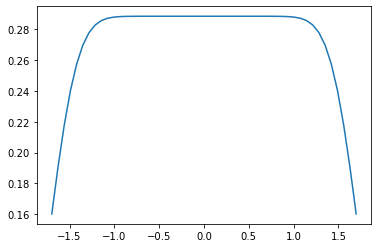

In [66]:
plt.plot(x,density(x))
plt.show()

### Handling missing values  

We may sometimes have missing value in  our data, Like in case of house-price examplse, the feature per capita crime rate , what if this feature in't availbel for all data point, you will then have missing value uses in the training or test data.  

In general with neural netorks, it's safe to input missing value as 0, with the condition that 0 isn't already a meaningful value.The network will learn from exposure to the data that the value 0 means `missin data` and will start ignoring the value.   

Note that if you're expecting missing value in the tezt data, but the network was trained on data without any missing values, the network won't have learned to ignore missing values, in this situation you should artificially generate training samples with missing entries: copy some training samples several times, and drop some if the features that you except are likely to be missing in the test data

### Feature Engineering  

*Feature Engineering* is a process of using your own knowledge about the data and about the machine learning algortihm at hand to make the algorithm work better by applying hardcoded(non learned) transformation to the data before it goes into the model.In many cases, it isn't reasonable to except machine learning model to except machine learbing model to be able to learn from completly arbitary data.The data need to be presented to the model that will make model's job easier. 

If you already understand the problem at a high level, then you can come up with much better input features for a machine-learning algorithm.The esscence of feature engineering: making a problem easierr by expressing it in a simpler way.It uually requires understnading of the problem in depth.  

Before deep learning, feature engineering used to be a critical, beacuse classical shallow algorithms didn't have hypotheisis space rich enough to learn useful features by themselves.The way we present the data is essential for its success.Befor convolutional neural network become successfule on MNIST digit-classification problem,solution were typically basd on harcoded features such as number of loop sin a digit image,=m the height of each digit in an image, histogram of pixel values and son on.Gortunatly modelrn deeplearningh removes the need for the most features engineering because neural networks are capable of automatically extracting useful features from raw data.

1. Good features still allow you to solve problems more elegantly while using fewer resources.For instnances, it would be ridiculous to solve the problem of reading a clock face using convulation network.  


2. Good features let you solve problems with far less data.The ability of deep-learning model to learn features on their own relies on having lots of training data available; if you have only few examples, then the information value in their features becomes critical.

# 4. Overfitting and underfitting
___


<img src="Screenshot-2020-02-06-at-11.06.24.png" height="600" width="400">

The performance of the model on the held-out validation data always peaked after a few epochs and then began to degrade:The model quickly starting to overfit on the training data.Overfitting happens in every machine-learning problems.Learning how to deal with ovefitting is essential to mastering machine learning.  

The fundamental issue in machine learning is the tension between optimization and generaliztion.Oprimization refers to the process of adjusting a model to get the best performance possible on training data(`the learning in machine learning`), Whereas `generaliztion` refers to how well the trained model performs on data it has never seen before.The goal of the game is to get good generalization, of course, but you don't control generalization; you can only adjust the model based on its training data.  

At the beginning of training,`optimzation` and `generalization` are correlated: the the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be `underfit`: there is still progress to be made; the network hasn't yet modeled all relevant patterns in the training data. But after a certian number of interation on the training data,generalization stops improving, and validation metrics stall and then begin to degrade: the model started to overfit. That is, it's **beginning to learn patterns that are specific to the training data but are misleading or irrelevant when it comes to new data.**   

To prevent a model from learning misleading or irrelevant pattern found in the training data, `the best solution is to get moe training data`. A model trained on more data will naturally generalizae batter.When that isn't possible, the next-best solution is to modulated the quantatiy of information that our model is allowed to store to add contraints on what information it's allowed to store.If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.  

The processing of fighing overfitting this way is called `regularization`. Let's review some of the most common regularization techniques.  



### 4.1 Reducing the networks's size   

The simplest way to prevent overfitting is to reduce the size of the model: the number of learnable parameters in the model(which is determied by the number of layers and number if units per layer). In deep learning, the number of learnable parameters in a model is often reffered to as the `model's capacity`.Intuitively, a model with more parameters has more `memorization capacity` and therfore can easily learn a perfect dictionary-like mapping between training and samples and their targets -- a mapping without any generalization power. For instances. a model with 500,000 binary parameters ciuld easily be made to learn the class of every digit in the MNIST training set: we need only 10 binary oarametrs for each of the 50,000 digits, but such as model would be useless for classifying new digit samples.Always keep this in mind: Deep-learning models tend to be good at fitting to the training data, but real challenge is genralization, not fitting.  

On the the other hand if the network has limited memorization resources, it won't be able to learn this mapping as easily; thus in order to minimize the loss, it will have to resort to learning compressed represnetaion that haev predictive power regarding targets, keep in mind that you should use models that have enough parameters that they don't undefit; your model shouldn't be starved for memorization resources.There is a compromise to be found between `too much capcity` and `not enough capacity`.  

Unfortunately there is no magical formula to determine the right number of layers ot the right size for each layer. we must evaluate an array of different architecture(on your validation set, not on your test set) in order to find the model size of your data.**The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new laers until you see diminishing return with regard to validation loss.**  

## Original model

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from random import shuffle

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/saurav/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/saurav/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

In [8]:
x_train.shape,x_test.shape

((25000,), (25000,))

In [9]:
y_train.shape,y_test.shape

((25000,), (25000,))

#### Maximum length of sequence

In [10]:
max([max(i) for i in x_train])

9999

### Preparing data

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key)for (key,value) in word_index.items()]) ##reverse it mapping indegers to word
decoded_review = " ".join([reverse_word_index.get(i-3,'?')for i in x_train[0]]) ## indices 0,1,2 are "padding","start of sequence  and unknown"
print(decoded_review) ## 0th review

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
import numpy as np

def vectorize_sequence(data):
    array = np.zeros((len(data),10000))
    for id,sequence in enumerate(data):
        array[id,sequence] = 1
    return array

In [13]:
x_train = vectorize_sequence(x_train)
x_test = vectorize_sequence(x_test)

In [14]:
y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

In [15]:
x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [16]:
y_train.shape ,y_test.shape

((25000,), (25000,))

In [81]:
x_train.shape

(25000, 10000)

In [82]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [83]:
partial_x_train.shape,partial_y_train.shape

((15000, 10000), (15000,))

### Preparing model

In [84]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=16,activation="relu",input_shape=(10000,)))
model.add(keras.layers.Dense(units=16,activation="relu"))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))

2022-02-04 21:32:34.181515: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-04 21:32:34.434457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-04 21:32:35.243883: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer="rmsprop",loss="BinaryCrossentropy",metrics=["accuracy"])

### Fitting data

In [87]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val),use_multiprocessing=True)

2022-02-04 21:32:53.798612: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-04 21:32:54.709507: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/20
30/30 [==============================] - 26s 511ms/step - loss: 0.6029 - accuracy: 0.6962 - val_loss: 0.4157 - val_accuracy: 0.8411
Epoch 2/20
30/30 [==============================] - 2s 77ms/step - loss: 0.3326 - accuracy: 0.8902 - val_loss: 0.3064 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2333 - accuracy: 0.9309 - val_loss: 0.2798 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1769 - accuracy: 0.9456 - val_loss: 0.2730 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1436 - accuracy: 0.9566 - val_loss: 0.2874 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1161 - accuracy: 0.9657 - val_loss: 0.3175 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0941 - accuracy: 0.9760 - val_loss: 0.3052 - val_accuracy: 0.8823
Epoch 8/20


In [88]:
result = model.evaluate(x_test,y_test,use_multiprocessing=True)

782/782 [==============================] - 6s 3ms/step - loss: 0.7537 - accuracy: 0.8516


### Model with lower capacity


In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units=4,activation="relu",input_shape=(10000,)))
model2.add(keras.layers.Dense(units=4,activation="relu",))
model2.add(keras.layers.Dense(units=1,activation="sigmoid",))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(optimizer="rmsprop",loss="BinaryCrossentropy",metrics=["accuracy"])

In [29]:
history2 = model2.fit(x=partial_x_train,y=partial_y_train,epochs=20,batch_size=512,validation_data = (x_val,y_val),use_multiprocessing=True)

Epoch 1/20
30/30 [==============================] - 26s 283ms/step - loss: 0.6083 - accuracy: 0.6931 - val_loss: 0.4506 - val_accuracy: 0.8501
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3956 - accuracy: 0.8839 - val_loss: 0.3610 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3040 - accuracy: 0.9103 - val_loss: 0.3171 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2443 - accuracy: 0.9258 - val_loss: 0.3059 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2066 - accuracy: 0.9389 - val_loss: 0.2829 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1766 - accuracy: 0.9485 - val_loss: 0.2798 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1534 - accuracy: 0.9551 - val_loss: 0.2800 - val_accuracy: 0.8861
Epoch 8/20


In [30]:
result2 = model2.evaluate(x_test,y_test,use_multiprocessing=True,return_dict=True)

782/782 [==============================] - 36s 3ms/step - loss: 0.4898 - accuracy: 0.8585


### Plotting validation loss of models

In [31]:
import matplotlib.pyplot as plt

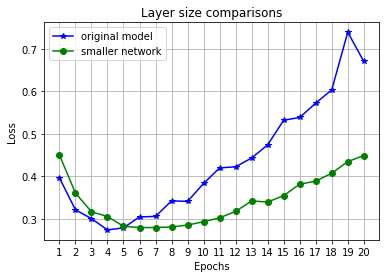

In [32]:
val_loss1 = history.history["val_loss"]
val_loss2 = history2.history["val_loss"]

epochs = [i for i in range(1,21)]
plt.plot(epochs,val_loss1,color="blue",marker="*",label="original model")
plt.plot(epochs,val_loss2,color="green",marker="o",label="smaller network")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Layer size comparisons")

plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

This figure show the comparision of the validation losses of the original network and the smaller network.The validtion loss of smaller network crosses the initial network.From this it is clear that smaller netowrk starts overfitting later than the refrence network, and its performance degraded more slowly once it starts overfitting.  


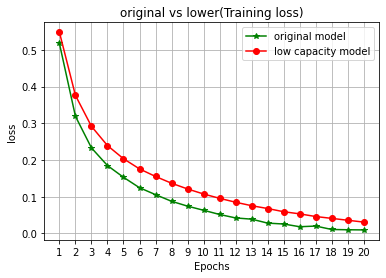

In [33]:
loss = history.history["loss"]
loss2 =history2.history["loss"]

plt.clf()
plt.plot(epochs,loss,color="green",marker="*",label="original model")
plt.plot(epochs,loss2,color="red",marker="o",label="low capacity model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs lower(Training loss)")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

In the traing loss the medium size model and the lower capacity model showed almost equal training loss curve, but still the lower capcaity model is gaining less loss as compred to original model with optimium neurons in layers


Now, let's add to this benchmark a network that has much more capcaity-for more than problem wants.

### Model with higher capacity
___

In [34]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(units=512,activation="relu",input_shape=(10000,)))
model3.add(keras.layers.Dense(units=512,activation="relu"))
model3.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [35]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [36]:
model3.compile(optimizer="rmsprop",loss="BinaryCrossentropy",metrics=["accuracy"])

In [37]:
history3 =  model3.fit(x=partial_x_train,y=partial_y_train,epochs=20,batch_size=512,use_multiprocessing=True,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 31s 915ms/step - loss: 0.6954 - accuracy: 0.6962 - val_loss: 0.5576 - val_accuracy: 0.7484
Epoch 2/20
30/30 [==============================] - 5s 168ms/step - loss: 0.2691 - accuracy: 0.8841 - val_loss: 0.3762 - val_accuracy: 0.8402
Epoch 3/20
30/30 [==============================] - 5s 159ms/step - loss: 0.1513 - accuracy: 0.9458 - val_loss: 0.2689 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 5s 157ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.3901 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 5s 153ms/step - loss: 0.0595 - accuracy: 0.9866 - val_loss: 0.3596 - val_accuracy: 0.8918
Epoch 6/20
30/30 [==============================] - 5s 152ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.4985 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 5s 154ms/step - loss: 6.2691e-04 - accuracy: 1.0000 - val_loss: 0.6116 - val_accuracy: 0.8875
E

In [38]:
result3 = model3.evaluate(x_test,y_test,use_multiprocessing=True)

782/782 [==============================] - 8s 6ms/step - loss: 1.4253 - accuracy: 0.8730


## Plotting orignal model vs higher capacity model
___


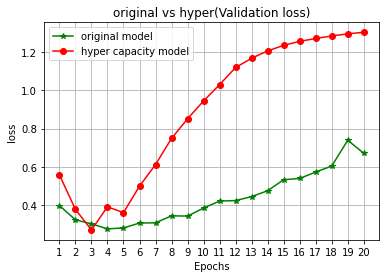

In [39]:
val_loss = history.history["val_loss"]
val_loss3 =history3.history["val_loss"]

plt.clf()
plt.plot(epochs,val_loss,color="green",marker="*",label="original model")
plt.plot(epochs,val_loss3,color="red",marker="o",label="hyper capacity model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs hyper(Validation loss)")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

The bigger network starts overfitting almost immediately, after just one epoch, and it ovefits much more severly.Its validation loss is also noisier.

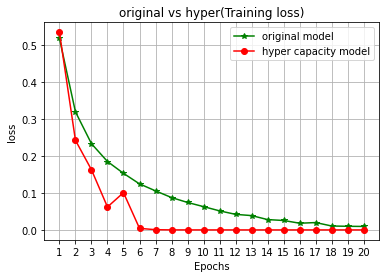

In [40]:
loss = history.history["loss"]
loss3 =history3.history["loss"]

plt.clf()
plt.plot(epochs,loss,color="green",marker="*",label="original model")
plt.plot(epochs,loss3,color="red",marker="o",label="hyper capacity model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs hyper(Training loss)")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

In the figure of training loss of both the nwtwork, as you can see the bigger network gets its training loss near zero very quickly.The more capacity of thenetwork has, the more quickly it can model the training data(resulting is low training loss), but the more susceptible it is to overfitting(resulting is large difference in training and validation loss).

### 4.2 Adding weight regularization
___

Given two explanation for something, the explanation more likely to be correct is the simplest one-the one that make fewer assumptions.This ideas also applies to the models learned by neural network: Given some training data and a network arhitecture, multiple set of weights values(multiple models) could explain the data. **Simpler models less likely to overfit than complex ones.**  

A `simple model` in this context is a model where the distribution of parameters values has less entropy(a model with less parameters). Thus a common way to mitigate overfitting is to put constraints on the complexity in a network by **forcing its weights to take only small values**. Which make the distribution of weights values more `regular`. This is called `weight regularization` and **it's done by adding to the loss function of the network a `cost` assocaited with having large weights.**

> **`L1 regularization`**: The cost added is propotional to the **absolute value of the weight coeffiecients**(the L1norm of weights).  

> **`L2 regularizaton`**: The cost added is propotional to **square of the value of weight coeffients**(the l2 norm norm of weights).The l2 regularization is also called the `weigth decay` in the context of neural network.  

In keras, weight regularizers are added to by passing `weight regularizer instances` to layers as a keyword arguments.


### L2 regularization
___

The model with a higher complexity is able to pick up and learn patterns (noise) in the data that are just caused by some random fluctuation or error. _**The network would be able to model each data sample of the distribution one-by-one, while not recognizing the true function that describes the distribution.**_

New arbitrary samples generated with the true function would have a high distance to the fit of the model. We also say that the model has a high variance.On the other hand, the lower complexity network models the distribution much better by not trying too hard to model each data pattern individually.  

>In practice, overfitting causes the neural network model to perform very well during training, but the performance gets much worse during inference time when faced with brand new data.  

>In short: Less complex neural networks are less susceptible to overfitting. To prevent overfitting or a high variance we must use something that is called regularization.


**The L2 regularization is the most common type of all regularization techniques and is also commonly known as weight decay or Ridge Regression.**  

During the L2 regularization the loss function of the neural network as extended by a so-called regularization term, which is called here $\Omega$, where $w$ is weight.  

$$\Omega(w) = ||w||2 = \sum_{i}\sum_{j}w_{i,j}^2$$  

The regularization term Ω is defined as the Euclidean Norm (or L2 norm) of the weight matrices, which is the sum over all squared weight values of a weight matrix. The **regularization term is weighted by the scalar alpha divided by two and added to the regular loss function** that is chosen for the current task. This leads to a new expression for the loss function:  


$$ \hat{L}(w) = \frac{\alpha}{2}||w||2 +L(w) = \frac{\alpha}{2}\sum_{i}\sum_{j}w_{i,j}^2 + L(w) $$  

**Alpha** is sometimes called as the regularization rate and is an additional hyperparameter we introduce into the neural network. Simply speaking alpha determines how much we regularize our model.   

we can compute the gradient of the new loss function and put the gradient into the update rule for the weights:  

$$ \nabla_{w} \hat{L}(w) = \alpha w + \nabla_{w}L(w)$$  

New weight after the gradient descnet.

$$W_{new} = w_{old} - \epsilon(\alpha w_{old} + \nabla_{w}L(w_{old})$$  

By adding the regularization term we introduce an additional subtraction from the current weights (first term in the equation).In other words independent of the gradient of the loss function we are making our weights a little bit smaller each time an update is performed.

### Adding L2 weight regularization to the model
___

In [41]:
from tensorflow.keras import regularizers

In [44]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(units=16,kernel_regularizer=regularizers.l2(l2=0.001),activation="relu",input_shape=(10000,)))
model4.add(keras.layers.Dense(units=16,kernel_regularizer=regularizers.l2(l2=0.001),activation="relu",))
model4.add(keras.layers.Dense(units=1,activation="sigmoid"))

In [45]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


`l2(0.001)` means every coeffiecent in the weight matrix of the layer will **add 0.001 * weight_coefficent_value to the total loss of the network**.Note that because this penalty is only added at training time, **the loss for this network will be much higher at training than at test time.**

In [46]:
model4.compile(optimizer="rmsprop",loss="BinaryCrossentropy",metrics=["accuracy"])

In [47]:
history4 = model4.fit(x=partial_x_train,
                      y=partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val,y_val),
                      use_multiprocessing=True)

Epoch 1/20
30/30 [==============================] - 19s 491ms/step - loss: 0.6171 - accuracy: 0.7018 - val_loss: 0.4056 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3507 - accuracy: 0.9000 - val_loss: 0.4073 - val_accuracy: 0.8478
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2764 - accuracy: 0.9235 - val_loss: 0.3288 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2390 - accuracy: 0.9418 - val_loss: 0.3449 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2174 - accuracy: 0.9458 - val_loss: 0.3601 - val_accuracy: 0.8766
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1970 - accuracy: 0.9574 - val_loss: 0.3439 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1916 - accuracy: 0.9566 - val_loss: 0.3516 - val_accuracy: 0.8826
Epoch 8/20


In [73]:
result4 = model4.evaluate(x=x_test,y=y_test,use_multiprocessing=True)

782/782 [==============================] - 3s 3ms/step - loss: 0.6111 - accuracy: 0.8276


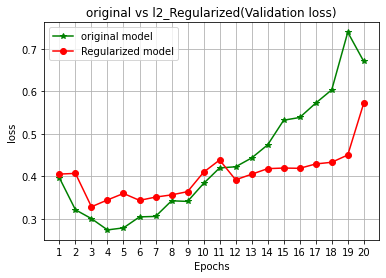

In [51]:
val_loss = history.history["val_loss"]
val_loss4 =history4.history["val_loss"]

plt.clf()
plt.plot(epochs,val_loss,color="green",marker="*",label="original model")
plt.plot(epochs,val_loss4,color="red",marker="o",label="Regularized model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs l2_Regularized(Validation loss)")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

As you can see the impact of L2 regularization penality, the model with L2 regularization has less loss as comapred to orignial model(without regularization),This means that regularized model become much more resistant to overfitting than the refrence model, even though both model has same number of parameters

### L1 Regularization
___

In the case of L1 regularization (also knows as Lasso regression), we simply use another regularization term Ω. This term is the sum of the absolute values of the weight parameters in a weight matrix:  

$$ \Omega(w) = ||w|| = \sum_{i}\sum_{j} |w_{i,j}|$$  

we multiply the regularization term by alpha and add the entire thing to the loss function.

$$ \hat{L}_{w} = \alpha||w||_{1} + L_{W} $$  

we multiply the regularization term by alpha and add the entire thing to the loss function.

[Deep understanding of L1, L2 and Droput in Deep learning]("https://towardsdatascience.com/regularization-in-deep-learning-l1-l2-and-dropout-377e75acc036")

### Implementing L1 regularization
___

In [75]:
model5 = keras.Sequential()
model5.add(keras.layers.Dense(units=16,kernel_regularizer=regularizers.l1(l1=0.001),activation="relu",input_shape=(10000,)))
model5.add(keras.layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l1(l1=0.001),))
model5.add(keras.layers.Dense(units=1,activation="sigmoid",))

In [76]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [77]:
model5.compile(optimizer="rmsprop",loss="BinaryCrossentropy",metrics=["accuracy"])

In [2]:
history5 = model5.fit(partial_x_train,partial_y_train,batch_size=512,epochs=20,use_multiprocessing=True,validation_data=(x_val,y_val))

NameError: name 'model5' is not defined

In [82]:
result5 = model5.evaluate(x=x_test,y=y_test,use_multiprocessing=True)

782/782 [==============================] - 3s 3ms/step - loss: 0.5142 - accuracy: 0.8671


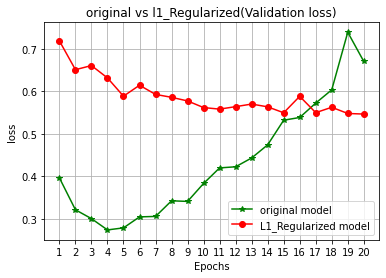

In [80]:
val_loss = history.history["val_loss"]
val_loss5 =history5.history["val_loss"]

plt.clf()
plt.plot(epochs,val_loss,color="green",marker="*",label="original model")
plt.plot(epochs,val_loss5,color="red",marker="o",label="L1_Regularized model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs l1_Regularized(Validation loss)")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

In the case of L1 regularized model, In the beginning loss is high due to weight reduction,But L1 regualrized model doesn't overfit it is still improving each epcoh.While the original model start to overfit after 5th epcoh.Model with L1 regularized model require large number of epcohs, while the original model in 4th epcoh achieve its minima.

## Adding Dropout
___
Droput is the most effective and most commonly used regularization techniques for neural networks,developed by Geoff Hinton and his student at the university of torronto.Dropout, applied to a layer,consist of randomly `dropping out`(seeting zero) a number of output features of the layer during the training.Let's say a given layer would normally return a vector `[0.2,0.5,1.3,0.8,1.1]` for a given input sample during training.After applying dropout, this vector will have a few zero entires distributed at random: for example, `[0,0.5,1.3,0,1.1]`. The `dropout rate` is the fraction of the features that are zeroed out; It is usually set between `0.2 and 0.5`.At test time, no units are dropped; instead the layer's output value are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than the training time.  

Consider a Numpy matrix containing the output of a layer, `layer_output`, of shape (batch_size,features).At training time, we zero out at random a fraction of the values of the matrix.  
```layer_output *= np.random.randint(0,high=2,size=layer_output.shape)```

In [77]:
## This is how dropout work in layers  
layer_output = np.random.random((4,))
layer_output*=np.random.randint(0,2,size= (4,)) ## As training time, drops out 50% of the uits in the output

At test time, we scale down the output by the dropout rate.Here we scale by 0.5(because we previously dropped half the units)

In [78]:
layer_output

array([0.        , 0.        , 0.66455662, 0.946942  ])

In [80]:
layer_output *= 0.5 ## At test time
layer_output

array([0.        , 0.        , 0.16613916, 0.2367355 ])

Note that this process can be implemented by doing both operations at training time and leaving the output uchanged at test time,which often the way it's implemented in practice.

In [ ]:
layer_output*=np.random.randint(0,2,size= (4,)) ## As training time, drops out 50% of the uits in the output
layer_output /= 0.5 ## Here we are scaling up rather than scaling down in this case.

**Dropout applied to an activation matrix at training time, with rescaling happening during training.At test time, activation matrix is unchanged.**

This method seems strange and arbitary.Why woulf this help in reducing overfitting?Hinton say he inspired by,among other things, a fraud-prevention mechanism used at banks.In his words,"I went to my bank.The tellers kept changing and i asked one of them why.He said he didn't know but they got moved around a lot.I figured it must because it would require cooperation between employees to successfully defraud the bank.This made me realizethat randomly removing a different subset of neurons on each example would prevent consipracies and thus reduce overfitting.The core idea is that introducing noise in the output values of the layer can break up happenstance patterns that aren't significant,which the network will start memorizing if no noise is present.  

In keras, we can introduce dropout in a network via the Dropout layer, which is applied to the ouput of the layer right to before it.

### Adding dropout layer in the network
___

In [91]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Dense(units=16,activation="relu",input_shape=(10000,)))
model5.add(keras.layers.Dropout(0.5))
model5.add(keras.layers.Dense(units=16,activation="relu",))
model5.add(keras.layers.Dropout(0.5))
model5.add(keras.layers.Dense(units=1,activation="sigmoid",))

In [92]:
model5.compile(optimizer="rmsprop",loss = "BinaryCrossentropy",metrics=["accuracy"])

In [94]:
history6 = model5.fit(x=partial_x_train,y=partial_y_train,batch_size=512,epochs=20,validation_data=(x_val,y_val),use_multiprocessing=True)

Epoch 1/20
30/30 [==============================] - 8s 278ms/step - loss: 0.3733 - accuracy: 0.8574 - val_loss: 0.3101 - val_accuracy: 0.8834
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3447 - accuracy: 0.8699 - val_loss: 0.2919 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3068 - accuracy: 0.8875 - val_loss: 0.2839 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2700 - accuracy: 0.9034 - val_loss: 0.2859 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2464 - accuracy: 0.9120 - val_loss: 0.2826 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2226 - accuracy: 0.9250 - val_loss: 0.2960 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2027 - accuracy: 0.9279 - val_loss: 0.3029 - val_accuracy: 0.8872
Epoch 8/20
3

In [96]:
result6 = model5.evaluate(x=x_test,y=y_test,use_multiprocessing=True)

782/782 [==============================] - 3s 3ms/step - loss: 0.5866 - accuracy: 0.8746


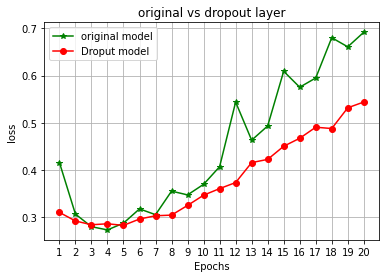

In [100]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
val_loss6 =history6.history["val_loss"]
epochs = [i for i in range(1,21)]
plt.clf()
plt.plot(epochs,val_loss,color="green",marker="*",label="original model")
plt.plot(epochs,val_loss6,color="red",marker="o",label="Droput model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("original vs dropout layer")
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

To recap, the most comman way to prevent overfitting are:
1. Get more Traing Data
2. Reduce opacity type
3. Add weight regularize
4. Add dropout.